In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

Years

In [2]:
#Years we concerned with 
start_year=1990
end_year=2017
year_range = range(start_year, end_year+1) 

# Target Data Reading - Salmon Survivals

In [3]:
#Read ZooPlanktonPerryData file
##obtain SalmonSurvivals_data
            #Take years less than or equal to 2017
                            #last row (year 2018) has only NaN


file_path = "../Data/ZooPlanktonPerryData.xlsx"
selected_sheet = "5. Salmon marine survivals"  
df = pd.read_excel(file_path, sheet_name=selected_sheet)
SalmonSurvivals_data = df[df["Ocean Entry Year"]<=2017]


#Rename the columns 
abbreviation_mapping = {
    'Ocean Entry Year': 'Year',
    'Cowichan Chinook': 'Cow_Ch',
    'Harrison Chinook': 'Har_Ch',
    'Puntledge Chinook': 'Pun_Ch',
    'Big Qualicum Coho': 'BQ_Coho'
}

salmonSurvivals = SalmonSurvivals_data.rename(columns=abbreviation_mapping)


# List of salmon types 
year_column = 'Year'
salmonTypes_List =  [col for col in salmonSurvivals.columns if col != year_column]

# Sea Level Data Read


In [4]:
## Read the Annual Mean Sea Levels
        #there are data of four ports
#Take the years between start_year and end_year
#Take the positive values (non existent data entered as -99999
#drop the columns 2 and 3 to keep year and sea level measurement
#rename the column that contains Sea Level measurement

file_path="../Data/SeaLevel_Point_Atkinson193.txt"
df=pd.read_csv(file_path, header=None,delimiter=';')
df= df[(df[0] >= start_year) & (df[0] <= end_year) & (df[1]>=0)].drop(columns=[2,3])
seaLevelPointA_clean =df.rename(columns={0: 'Year', 1: 'SeaLevel_Point_Atkinson'})
#missing year 1997

file_path="../Data/SeaLevel_Port_Angeles2127.txt"
df =pd.read_csv(file_path, header=None,delimiter=';')
df= df[(df[0] >= start_year) & (df[0] <= end_year) & (df[1]>=0)].drop(columns=[2,3])
seaLevelPortA_clean= df.rename(columns={0: 'Year', 1: 'SeaLevel_Port_Angeles'})
#no missing year

file_path="../Data/SeaLevel_Campbell_River1323.txt"
df=pd.read_csv(file_path, header=None,delimiter=';')
df= df[(df[0] >= start_year) & (df[0] <= end_year) & (df[1]>=0)].drop(columns=[2,3])
seaLevelCampbellR_clean= df.rename(columns={0: 'Year', 1: 'SeaLevel_Campbell_River'})
#missing year 1995 & 1996

file_path="../Data/SeaLevel_Cherry_annualMean.txt"
df= pd.read_csv(file_path, header=None,delimiter=';')
df= df[(df[0] >= start_year) & (df[0] <= end_year) & (df[1]>=0)].drop(columns=[2,3])
seaLevelCherryP_clean= df.rename(columns={0: 'Year', 1: 'SeaLevel_Cherry'})
#missing year 1994


#Merge the sea Levels of four ports
#Calculate their average 
    #missing data is ignored 
        #note: if a year is missing it's only missing at most one of the ports

merged_df= pd.merge(seaLevelPortA_clean, seaLevelPointA_clean, on='Year', how='outer')
merged_df = pd.merge(merged_df, seaLevelCampbellR_clean, on='Year', how='outer')
seaLevels = pd.merge(merged_df, seaLevelCherryP_clean, on='Year', how='outer')

seaLevels['av_SeaLevels']= seaLevels.iloc[:,1:].mean(axis=1, skipna=True)


## Obtained Data Frame

In [5]:
display(seaLevels.head(3))
seaLevels.tail(3)

,Year,SeaLevel_Port_Angeles,SeaLevel_Point_Atkinson,SeaLevel_Campbell_River,SeaLevel_Cherry,av_SeaLevels
0,1990,6940,7048.0,7036.0,7002.0,7006.5
1,1991,6923,7047.0,7031.0,7007.0,7002.0
2,1992,7007,7109.0,7083.0,7069.0,7067.0


,Year,SeaLevel_Port_Angeles,SeaLevel_Point_Atkinson,SeaLevel_Campbell_River,SeaLevel_Cherry,av_SeaLevels
25,2015,7005,7131.0,7032.0,7055.0,7055.75
26,2016,7016,7135.0,7042.0,7061.0,7063.50
27,2017,6998,7118.0,7016.0,7047.0,7044.75


# Plots

## Line Plots For comparing the ports

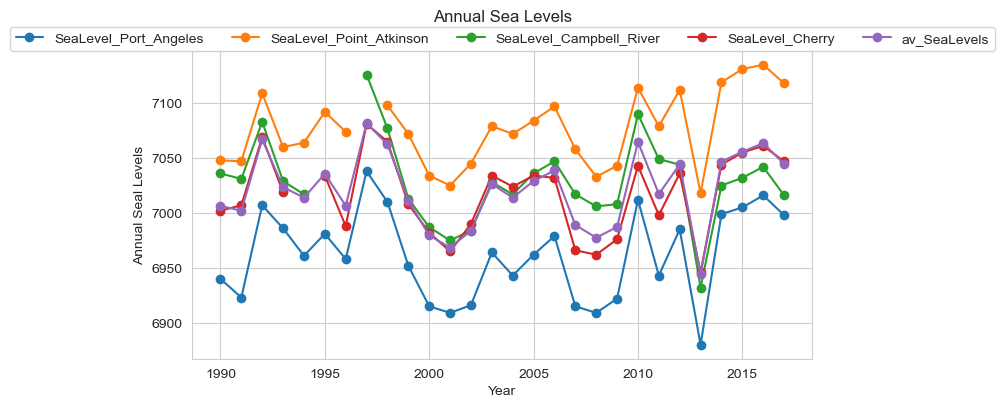

In [6]:
# Plot Annual Sea Levels for the chosen ports Over the Years
plt.figure(figsize=(8, 4))

for port in seaLevels.columns:
    if port != 'Year':
        plt.plot(seaLevels['Year'], seaLevels[port], label=port, marker='o')

plt.title('Annual Sea Levels' , pad=21)
plt.xlabel('Year')
plt.ylabel("Annual Seal Levels")
plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, 1.1), ncol=len(seaLevels.columns)-1)
plt.grid(True)
plt.show()

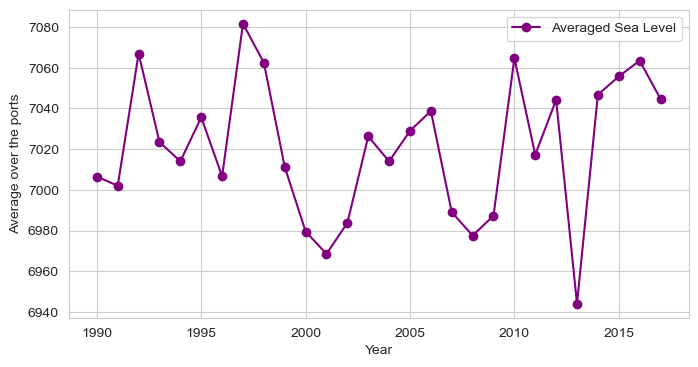

In [7]:
## Plot Annual Mean Sea Level Over the Years
plt.figure(figsize=(8, 4))

plt.plot(seaLevels['Year'], 
         seaLevels['av_SeaLevels'], 
         label="Averaged Sea Level", 
         marker='o',
        color='purple')


plt.xlabel('Year')
plt.ylabel('Average over the ports')
plt.legend()
plt.grid(True)
plt.show()

## Function for scatter plotting

In [8]:
##Makes scatter plot for the given given data versus Salmon Survivals

#Generate a 2x2 subplot scatter plots of
                    #survival of different salmon types 
                            #vs features of a given data frame
    #Parameters:
            #df: data frame containing data to be plotted
            #col_exclude list of column names for the data to be excluded default is empty list
            #year_col column name representing the year. Default is 'Year'
            
def scatter_All_salmonSurv (df, col_exclude=[], year_col='Year' ):
    # Check if year_col is set to the default value 'Year' and merge accordingly
    if year_col=='Year':
        merged_data = pd.merge(df, salmonSurvivals, on='Year')
    else:
        merged_data = pd.merge(df, salmonSurvivals, left_on=year_col ,right_on='Year')
        
    for col_plot in df.columns:
        if col_plot not in col_exclude + [year_col]:

            #Scatter plot

            ## fill in plt.subplots
            fig,axes = plt.subplots(2,2,figsize=(9,9))

            ## fill in the 0,0 plot here
            salmon_type=salmonTypes_List[0]
            axes[0,0].scatter(merged_data[col_plot], merged_data[salmon_type], label=salmon_type, marker='o')
            axes[0,0].set_xlabel(col_plot, fontsize=10)
            axes[0,0].set_ylabel(salmon_type+ ' Survival', fontsize=10)


            ## fill in the 0,1 plot here
            salmon_type=salmonTypes_List[1]
            axes[0,1].scatter(merged_data[col_plot], merged_data[salmon_type], label=salmon_type, marker='o')
            axes[0,1].set_xlabel(col_plot, fontsize=10)
            axes[0,1].set_ylabel(salmon_type+ ' Survival', fontsize=10)
            axes[0,1].yaxis.tick_right()  # Move y-axis ticks to the right
            axes[0,1].yaxis.set_label_position("right")  # Set y-axis label position to the right


            ## fill in the 1,0 plot here
            salmon_type=salmonTypes_List[2]
            axes[1,0].scatter(merged_data[col_plot], merged_data[salmon_type], label=salmon_type, marker='o')
            axes[1,0].set_xlabel(col_plot, fontsize=10)
            axes[1,0].set_ylabel(salmon_type+ ' Survival', fontsize=10)

            ## fill in the 1,1 plot here
            salmon_type=salmonTypes_List[3]
            axes[1,1].scatter(merged_data[col_plot], merged_data[salmon_type], label=salmon_type, marker='o')
            axes[1,1].set_xlabel(col_plot, fontsize=10)
            axes[1,1].set_ylabel(salmon_type+ ' Survival', fontsize=10)
            axes[1,1].yaxis.tick_right()  # Move y-axis ticks to the right
            axes[1,1].yaxis.set_label_position("right")  # Set y-axis label position to the right

            # Display the plot
            plt.show()

## Plots for analyzing feature and target correlation

                                Scatter Plots for Average Sea Level                                 


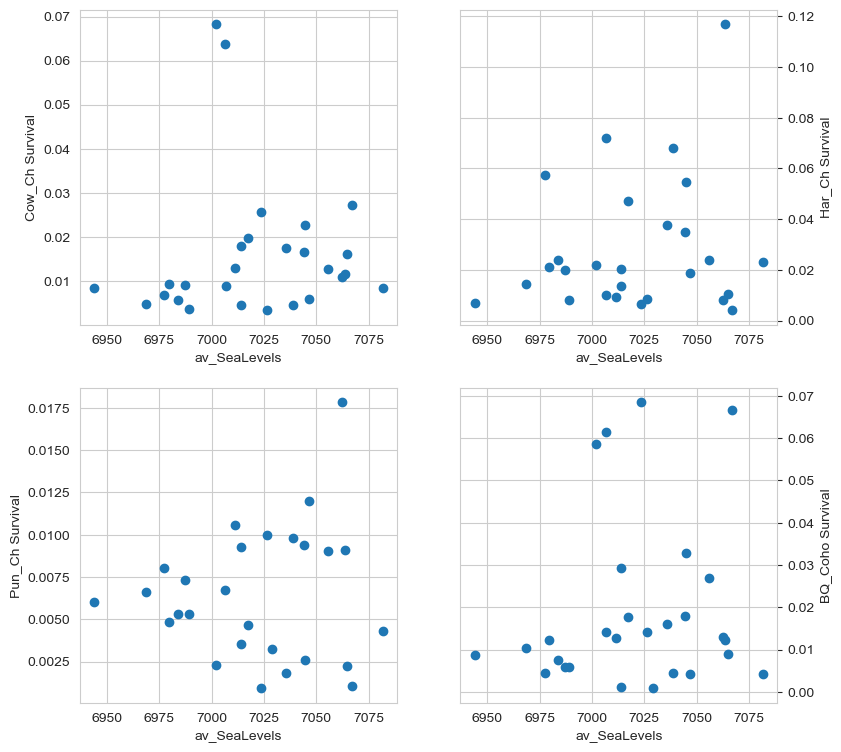

In [9]:
print('Scatter Plots for Average Sea Level'.center(100))
scatter_All_salmonSurv(seaLevels[['Year', 'av_SeaLevels']] )

                                              Scatter Plots for each port                                               


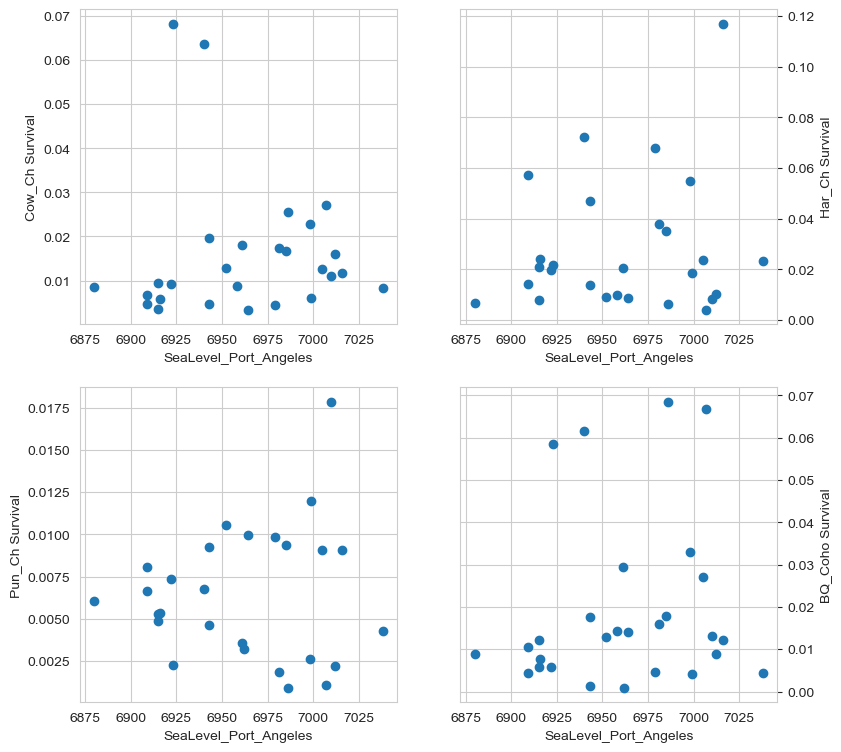

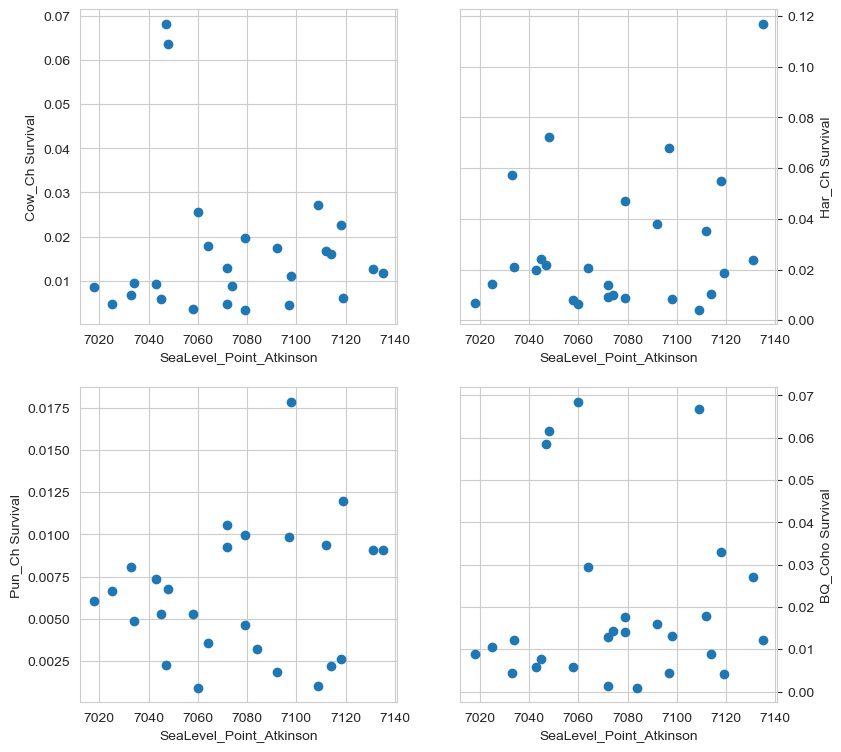

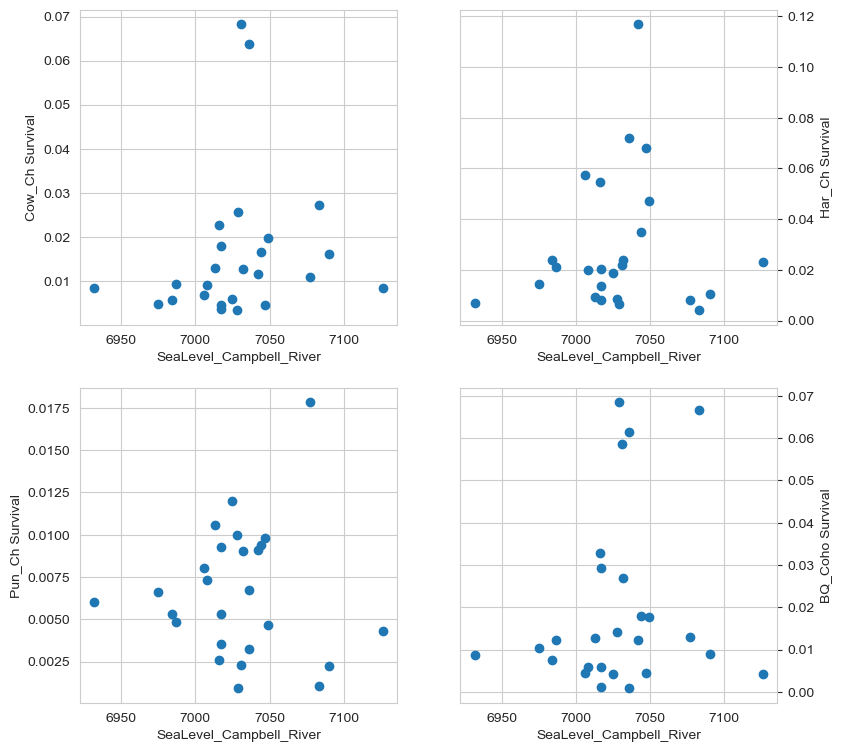

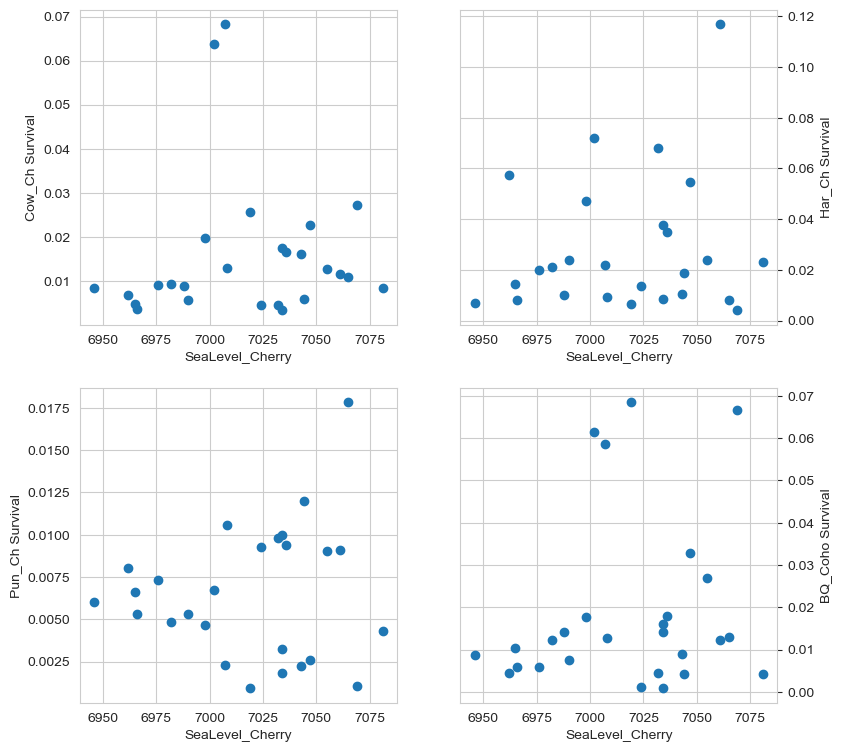

In [10]:
print('Scatter Plots for each port'.center(120))
scatter_All_salmonSurv(seaLevels, ['av_SeaLevels'])


Trends of Average Sea Level and Salmon Survivals


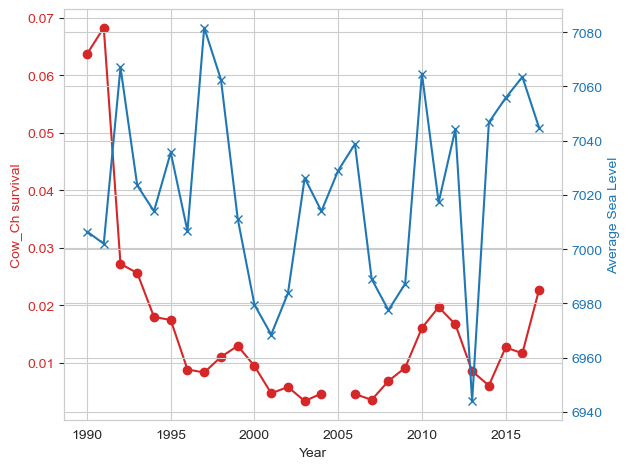

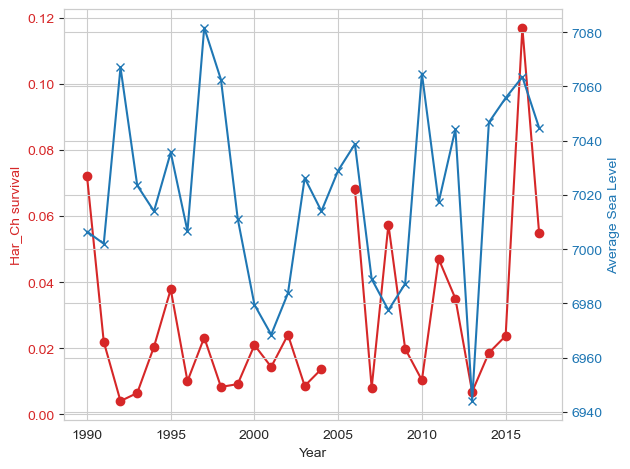

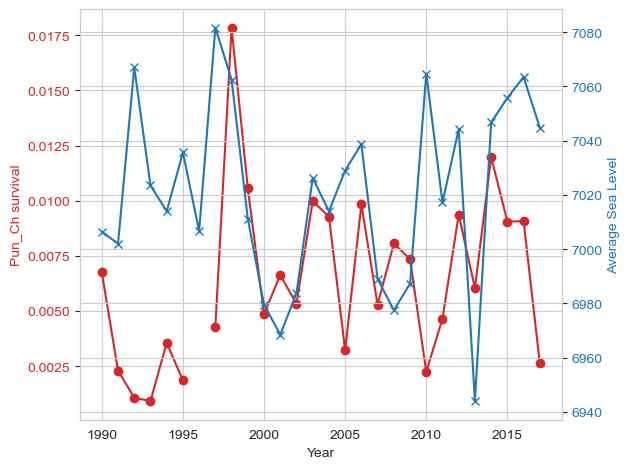

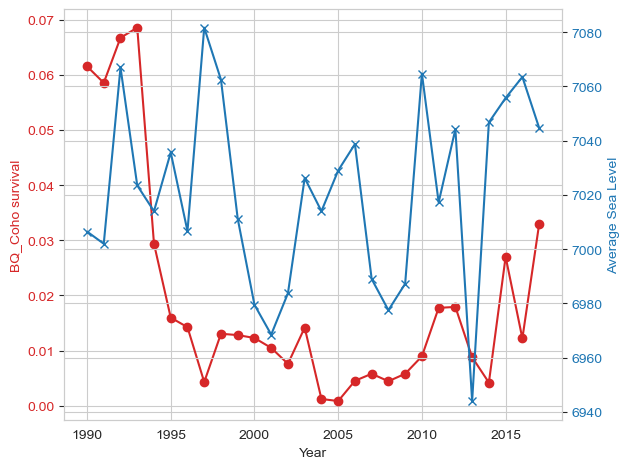

In [11]:
print("Trends of Average Sea Level and Salmon Survivals")
merged_data = pd.merge(seaLevels, salmonSurvivals, on='Year')
for salmon_type in salmonTypes_List:

                # Line plotting 
                fig, ax1 = plt.subplots()

                color = 'tab:red'
                ax1.set_xlabel('Year')
                ax1.set_ylabel(salmon_type + ' survival', color=color)
                ax1.plot(merged_data['Year'], merged_data[salmon_type], color=color, marker='o')
                ax1.tick_params(axis='y', labelcolor=color)

                #a second axes that shares the same x-axis
                ax2 = ax1.twinx()

                color = 'tab:blue'
                ax2.set_ylabel('Average Sea Level', color=color)
                ax2.plot(merged_data['Year'], merged_data['av_SeaLevels'], color=color,marker='x')
                ax2.tick_params(axis='y', labelcolor=color)

                fig.tight_layout()  # otherwise the right y-label is slightly clipped
                plt.show()


# Filling the missing data

In [12]:
seaLevels_noNan = seaLevels.copy()
#has few NaN values, fill them with the average
seaLevels_noNan.iloc[7,2] = seaLevels.iloc[7,5]
seaLevels_noNan.iloc[5,3] = seaLevels.iloc[5,5] 
seaLevels_noNan.iloc[6,3] = seaLevels.iloc[6,5] 
seaLevels_noNan.iloc[4,4] = seaLevels.iloc[4,5] 

## Visiualisaton of filled data versus original

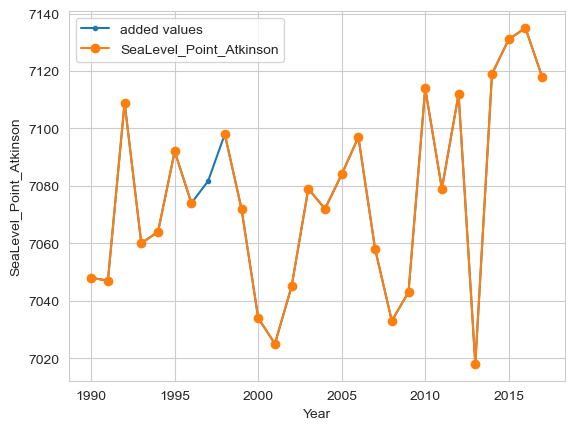

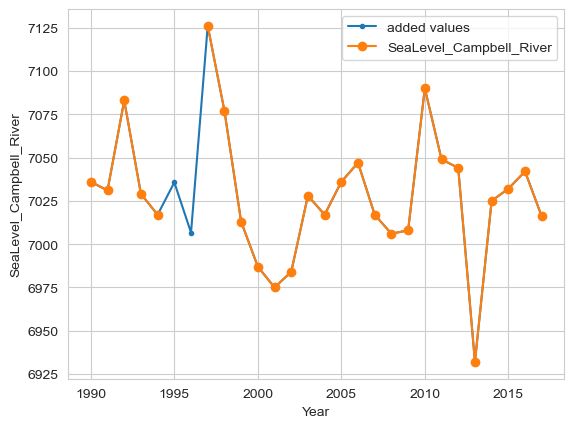

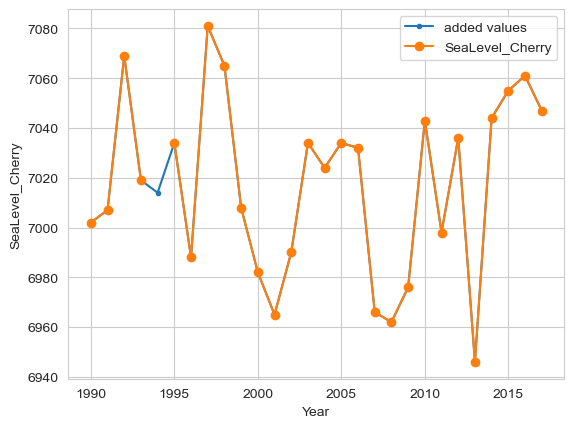

In [13]:
for port in seaLevels.iloc[:,2:5].columns:

        plt.plot(seaLevels_noNan['Year'], seaLevels_noNan[port], label='added values', marker='.')
        plt.plot(seaLevels['Year'], seaLevels[port], label=port, marker='o')


        plt.xlabel('Year')
        plt.ylabel(port)
        plt.legend()
        plt.grid(True)
        plt.show()